In [1]:
#%pip install matplotlib pandas

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("salary_data.csv").head(100)
df = pd.DataFrame({
    "x" : df["Years of Experience"],
    "y" : df["Salary"]
})

df

,x,y
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0
...,...,...
95,12.0,65000.0
96,22.0,160000.0
97,1.0,35000.0
98,10.0,90000.0


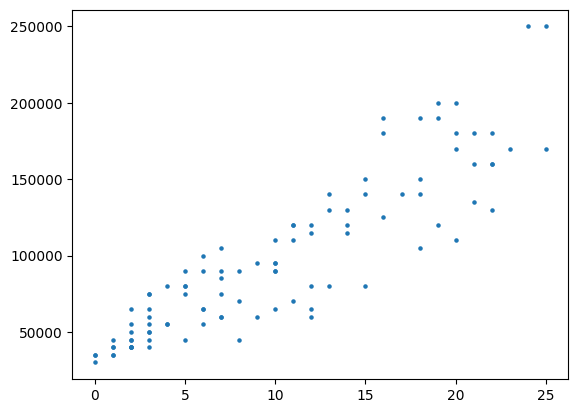

In [3]:
plt.scatter(df[["x"]], df["y"], s=5)
plt.show()


In [4]:
def cost_function(m, b):
    total = 0
    for i in range(len(df)):
        total+=df["y"].iloc[i]-(m*df["x"]+b)**2
    return total/len(df)

In [5]:
# I don't fully understand this, but I'm following this video https://www.youtube.com/watch?v=VmbA0pi2cRQ&t=254s by NeuralNine for a little understanding 
def gradient_descent(current_m, current_b, rate):
    m_gradient = 0
    b_gradient = 0

    n = len(df)

    for i in range(n):
        x = df["x"].iloc[i]
        y = df["y"].iloc[i]

        m_gradient += (-2/n) * x * (y - (current_m * x + current_b))
        b_gradient += (-2/n) * (y - (current_m * x + current_b))

    
    m = current_m - m_gradient * rate
    b = current_b - b_gradient * rate

    return m, b

Epoch 0


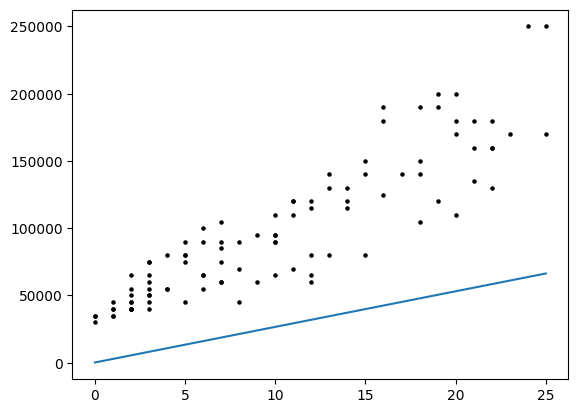

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10


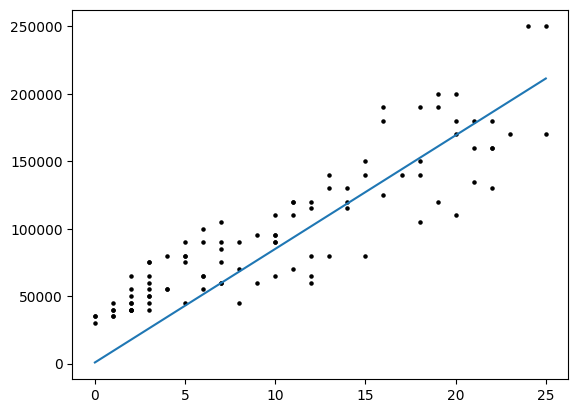

Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20


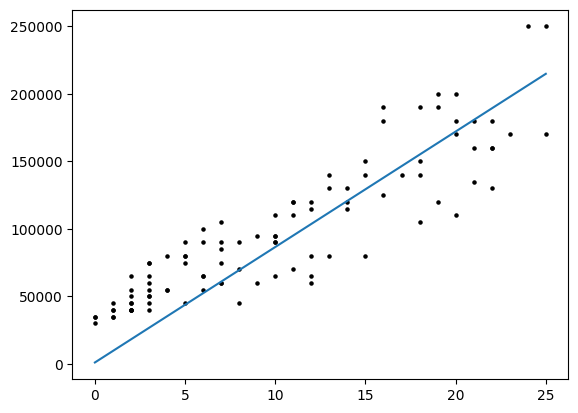

Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30


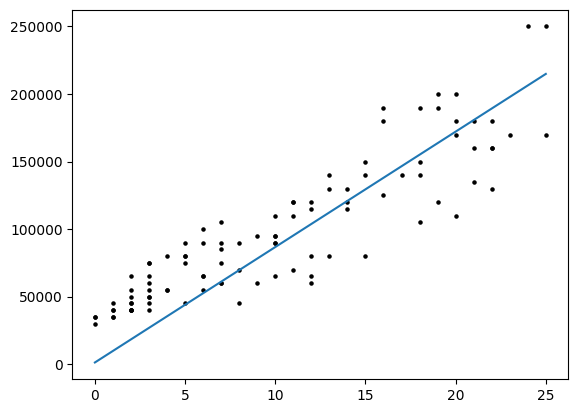

Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40


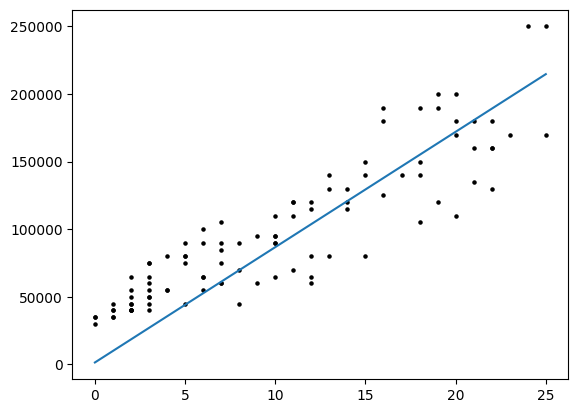

Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50


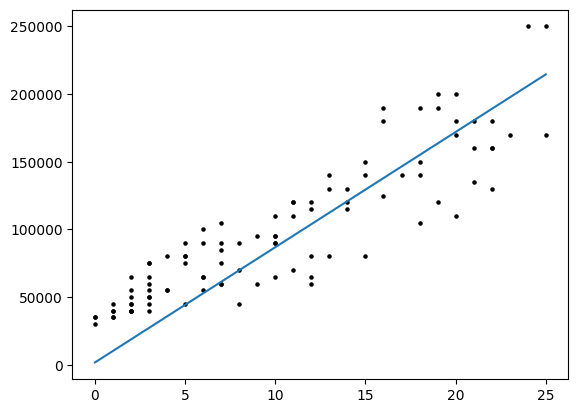

Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Epoch 58
Epoch 59
Epoch 60


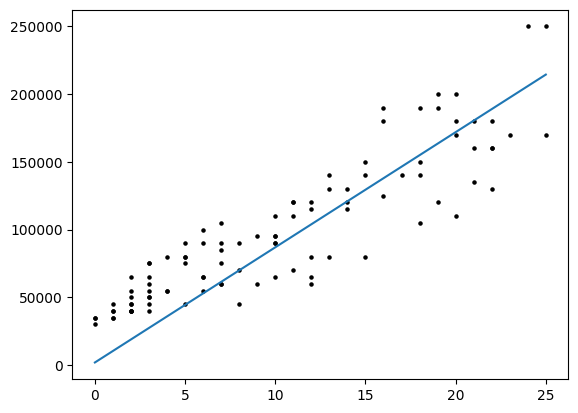

Epoch 61
Epoch 62
Epoch 63
Epoch 64
Epoch 65
Epoch 66
Epoch 67
Epoch 68
Epoch 69
Epoch 70


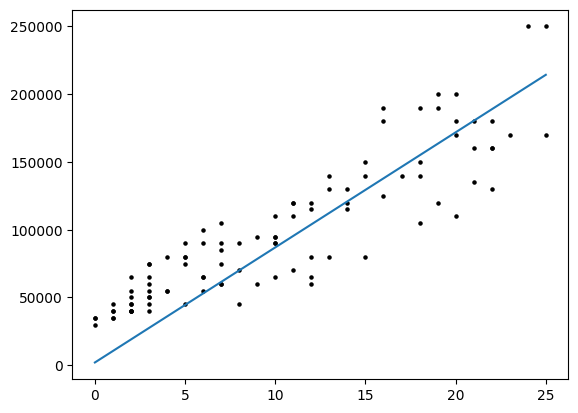

Epoch 71
Epoch 72
Epoch 73
Epoch 74
Epoch 75
Epoch 76
Epoch 77
Epoch 78
Epoch 79
Epoch 80


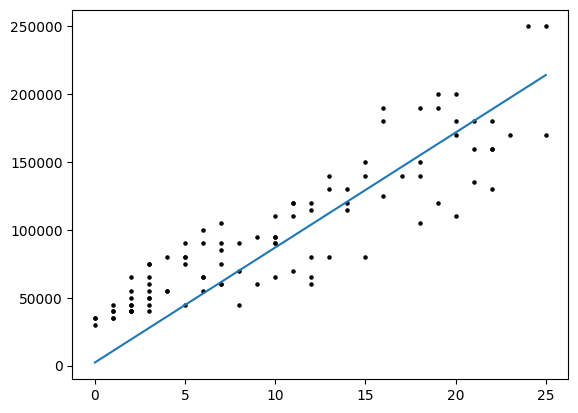

Epoch 81
Epoch 82
Epoch 83
Epoch 84
Epoch 85
Epoch 86
Epoch 87
Epoch 88
Epoch 89
Epoch 90


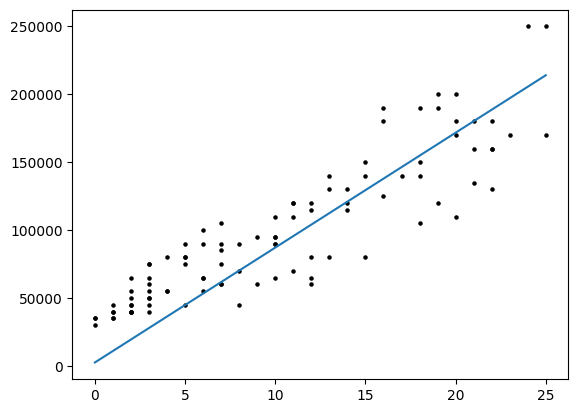

Epoch 91
Epoch 92
Epoch 93
Epoch 94
Epoch 95
Epoch 96
Epoch 97
Epoch 98
Epoch 99
Epoch 100


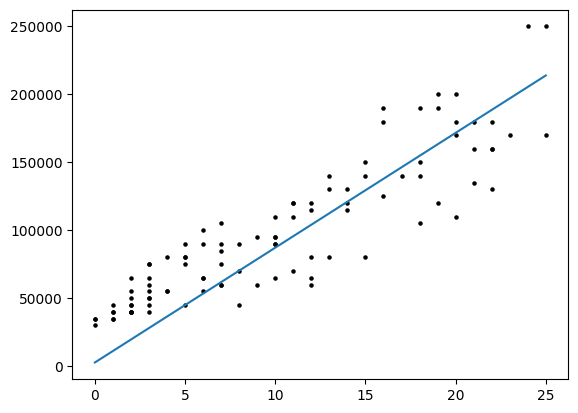

Epoch 101
Epoch 102
Epoch 103
Epoch 104
Epoch 105
Epoch 106
Epoch 107
Epoch 108
Epoch 109
Epoch 110


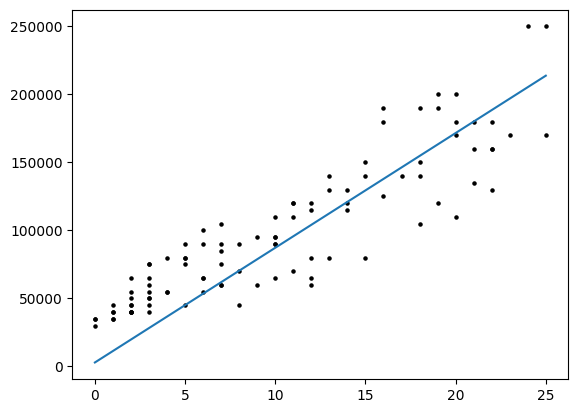

Epoch 111
Epoch 112
Epoch 113
Epoch 114
Epoch 115
Epoch 116
Epoch 117
Epoch 118
Epoch 119
Epoch 120


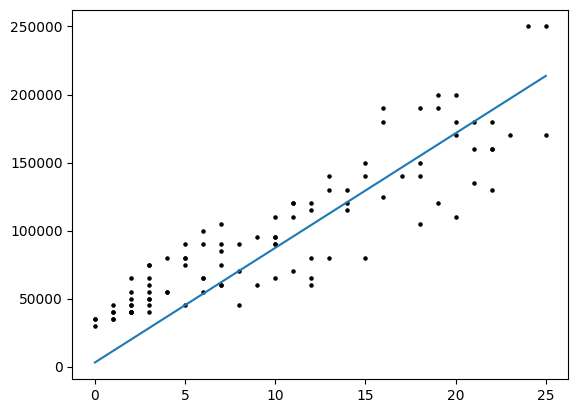

Epoch 121
Epoch 122
Epoch 123
Epoch 124
Epoch 125
Epoch 126
Epoch 127
Epoch 128
Epoch 129
Epoch 130


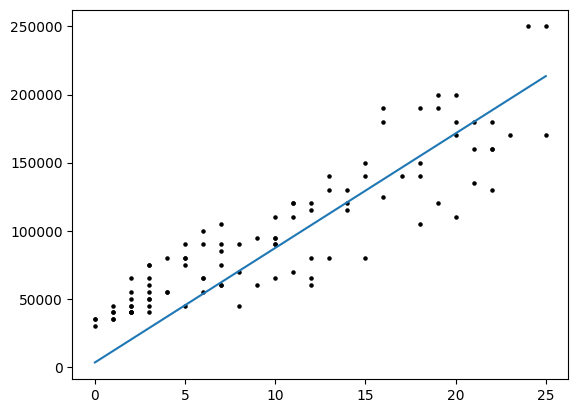

Epoch 131
Epoch 132
Epoch 133
Epoch 134
Epoch 135
Epoch 136
Epoch 137
Epoch 138
Epoch 139
Epoch 140


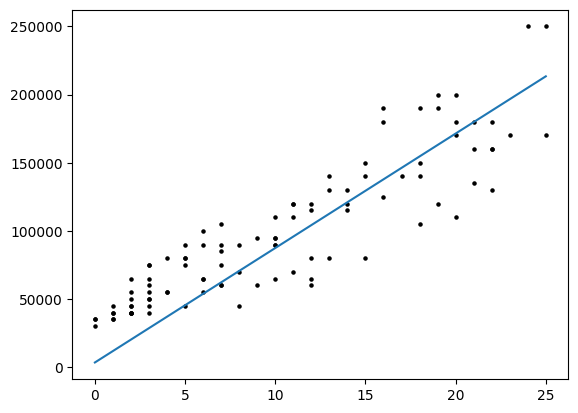

Epoch 141
Epoch 142
Epoch 143
Epoch 144
Epoch 145
Epoch 146
Epoch 147
Epoch 148
Epoch 149
Epoch 150


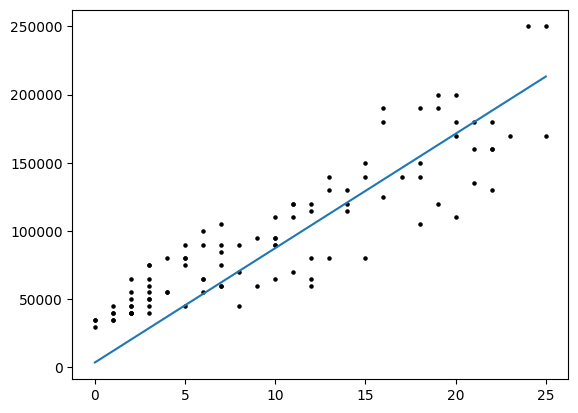

Epoch 151
Epoch 152
Epoch 153
Epoch 154
Epoch 155
Epoch 156
Epoch 157
Epoch 158
Epoch 159
Epoch 160


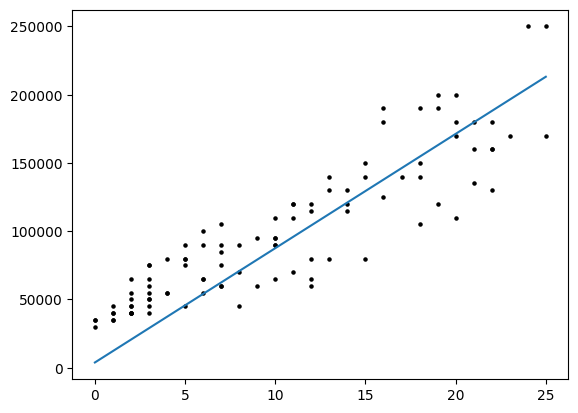

Epoch 161
Epoch 162
Epoch 163
Epoch 164
Epoch 165
Epoch 166
Epoch 167
Epoch 168
Epoch 169
Epoch 170


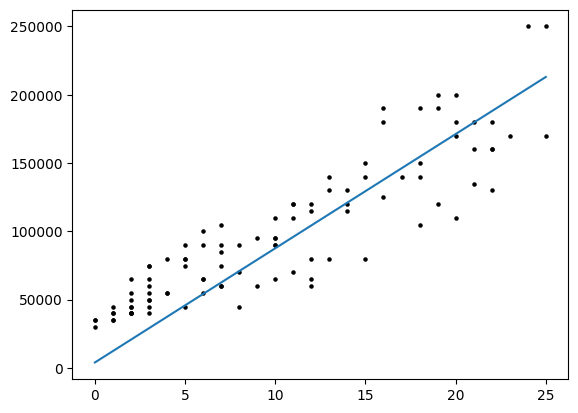

Epoch 171
Epoch 172
Epoch 173
Epoch 174
Epoch 175
Epoch 176
Epoch 177
Epoch 178
Epoch 179
Epoch 180


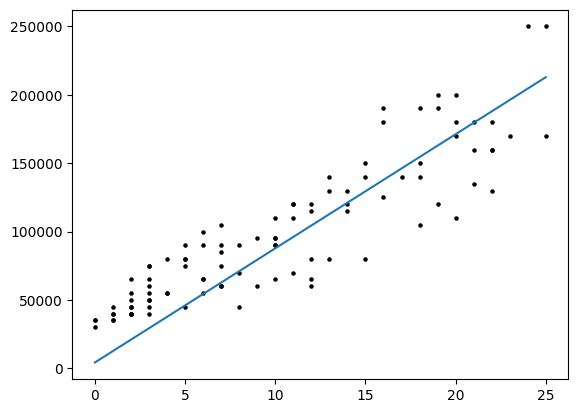

Epoch 181
Epoch 182
Epoch 183
Epoch 184
Epoch 185
Epoch 186
Epoch 187
Epoch 188
Epoch 189
Epoch 190


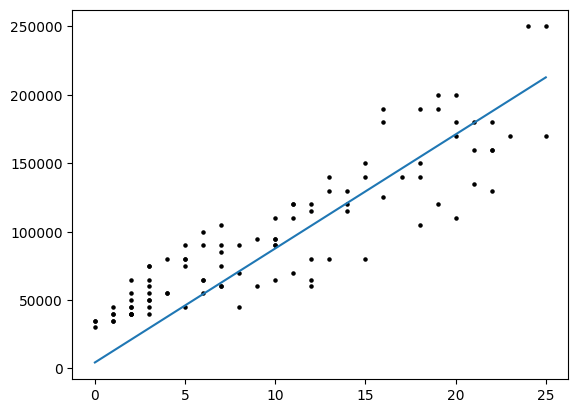

Epoch 191
Epoch 192
Epoch 193
Epoch 194
Epoch 195
Epoch 196
Epoch 197
Epoch 198
Epoch 199


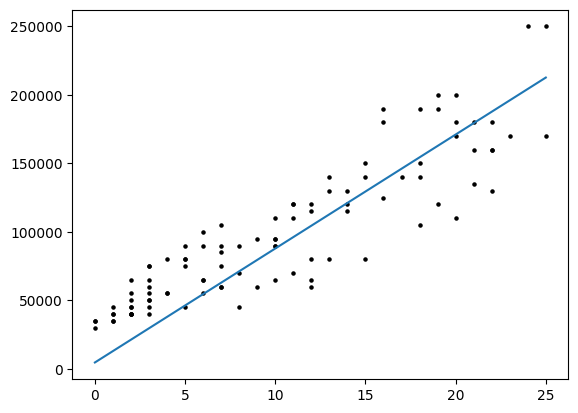

In [6]:
m = 0
b = 0
rate = 0.001
epochs = 200

for i in range(epochs):
    print(f"Epoch {i}")
    m, b = gradient_descent(m, b, rate)
    if i % 10 == 0:
        plt.scatter(df[["x"]], df["y"], color="black", s=5)
        plt.plot(list(range(int(df["x"].min()), int(df["x"].max()+1))), [i*m+b for i in range(int(df["x"].min()), int(df["x"].max()+1))])
        plt.show()

plt.scatter(df[["x"]], df["y"], color="black", s=5)
plt.plot(list(range(int(df["x"].min()), int(df["x"].max()+1))), [i*m+b for i in range(int(df["x"].min()), int(df["x"].max()+1))])
plt.show()